#Data

Léo Dupire

##Get Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
%cd /content/gdrive/MyDrive/Projects/Collision-Prediction/data
# !gdown https://drive.google.com/drive/u/0/folders/1h27x1bqewBEqm3cuP8oE9O8F3LOgDPPO
# !unzip Dataset_Student_V2.zip

/content/gdrive/MyDrive/Projects/Collision-Prediction/data
Archive:  val_masks.pt.zip
  inflating: val_masks.pt            


In [ ]:
%cd Desktop
!pwd

/Users/leodupire/Desktop
/Users/leodupire/Desktop


In [ ]:
import os
import torch
import numpy as np
import tqdm.auto as tqdm
import imageio.v3 as iio
import matplotlib.pyplot as plt

In [ ]:
P = "Dataset_Student"

In [ ]:
#@title Images
imgs = list(range(1000))
for path in tqdm.tqdm(os.listdir(f"{P}/train/")):
  temp = []
  for i in range(22):
    copy = np.copy(iio.imread(f"{P}/train/{path}/image_{i}.png"))
    temp.append(torch.Tensor(copy))
  imgs[int(path.split("_")[1])] = torch.stack(temp)
imgs = torch.stack(imgs).to(int)
torch.save(imgs, 'imgs.pt')

val_imgs = list(range(1000))
for path in tqdm.tqdm(os.listdir(f"{P}/val/")):
  temp = []
  for i in range(22):
    copy = np.copy(iio.imread(f"{P}/val/{path}/image_{i}.png"))
    temp.append(torch.Tensor(copy))
  val_imgs[int(path.split("_")[1]) - 1000] = torch.stack(temp)
val_imgs = torch.stack(val_imgs).to(int)
torch.save(val_imgs, 'val_imgs.pt')

In [ ]:
#@title Masks
masks = []
for path in tqdm.tqdm(os.listdir(f"{P}/train/")):
  masks.append(torch.Tensor(np.load(f"{P}/train/{path}/mask.npy")))
masks = torch.stack(masks)
torch.save(masks, 'masks.pt')

val_masks = list(range(1000))
for path in tqdm.tqdm(os.listdir(f"{P}/val/")):
  val_masks[int(path.split("_")[1]) - 1000] = torch.Tensor(np.load(f"{P}/val/{path}/mask.npy"))
val_masks = torch.stack(val_masks)
torch.save(val_masks, 'val_masks.pt')

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
imgs = torch.load('./imgs.pt')

In [ ]:
print(imgs.shape)
print(val_imgs.shape)

print(masks.shape)
print(val_masks.shape)

torch.Size([1000, 22, 160, 240, 3])


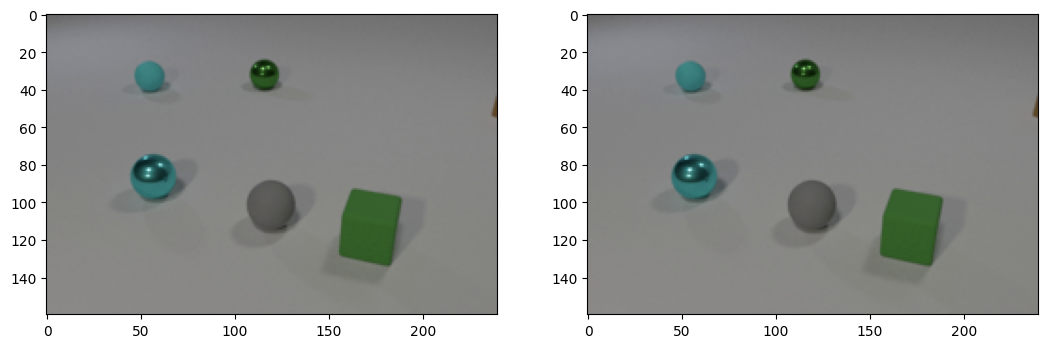

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(6.4*2, 4.8))
axes[0].imshow(imgs[0][0])
axes[1].imshow(masks[0][0])
plt.show()

In [ ]:
#@title Unlabeled Images
unlabeled_imgs = list(range(13000))
for path in tqdm.tqdm(os.listdir(f"{P}/unlabeled/")):
  temp = []
  for i in range(22):
    print(path, i)
    copy = np.copy(torch.Tensor(iio.imread(f"{P}/unlabeled/{path}/image_{i}.png")))
    temp.append(torch.Tensor(copy))
  unlabeled_imgs[int(path.split("_")[1])-2000] = torch.stack(temp)
unlabeled_imgs = torch.stack(unlabeled_imgs).to(int)
torch.save(unlabeled_imgs, 'unlabeled_imgs.pt')

In [ ]:
#@title SUBMISSION Images
P_h = "hidden"

hidden_imgs = list(range(2000))
for path in tqdm.tqdm(os.listdir(f"{P_h}/")):
  temp = []
  for i in range(11):
    copy = np.copy(torch.Tensor(iio.imread(f"{P_h}/{path}/image_{i}.png")))
    temp.append(torch.Tensor(copy))
  hidden_imgs[int(path.split("_")[1])-15000] = torch.stack(temp)
hidden_imgs = torch.stack(hidden_imgs).to(int)
torch.save(hidden_imgs, 'hidden_imgs.pt')

  0%|          | 0/2000 [00:00<?, ?it/s]

##Visualization

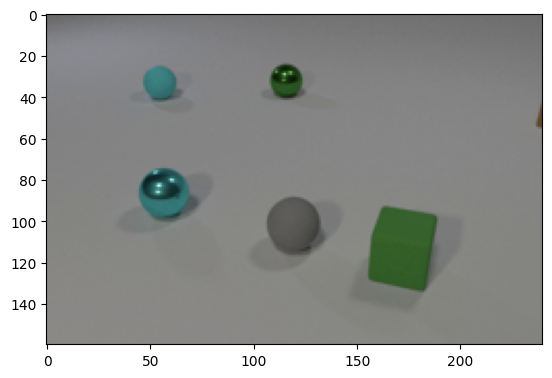

In [ ]:
img = iio.imread("Dataset_Student/train/video_0/image_0.png")
plt.imshow(img)

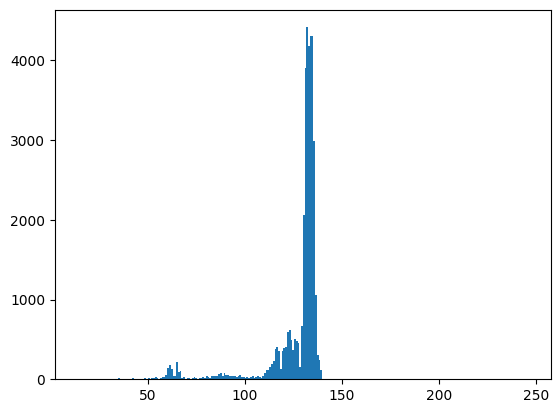

In [ ]:
plt.hist(img.mean(-1).reshape(-1),bins=256)
plt.show()

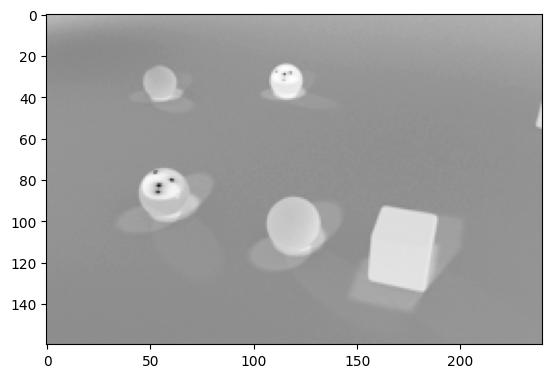

In [ ]:
plt.imshow(img.mean(-1),cmap='Greys')
plt.show()